Install requirements: uncomment the following lines to prepare the NetPyNE tutorial environment. Warning, troubleshooting required on a case by case basis, I would advise going through the official tutorial for installation instead.

In [1]:
# mkdir netpyne_tuts
# && cd netpyne_tuts 
# && export PATH=/bin:/usr/bin && 
# python3 -m venv env && source env/bin/activate &&
# python3 -m pip install --upgrade pip && python3 -m pip install --upgrade ipython && python3 -m pip install --upgrade ipykernel && python3 -m pip install --upgrade jupyter
# && ipython kernel install --user --name=env && python3 -m pip install --upgrade neuron &&
# git clone --depth 1 https://github.com/suny-downstate-medical-center/netpyne.git && python3 -m pip install -e netpyne && cp -r netpyne/netpyne/tutorials . && cd tutorials && jupyter notebook

Import required packages:

In [2]:
from neuron import h
from netpyne import specs, sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random


Initialize parameter variables:

In [3]:
netParams = specs.NetParams()
simConfig = specs.SimConfig()

Load parameters from parameters_setup: (it is rather long, would be hard to navigate the notebook with all parameters here)

In [4]:
from parameters_setup import netParams, simConfig, stimulation_percentage

Test if parameters loaded properly by checking OHC cell type:

In [5]:
netParams.cellParams["Outer_Hair_Cell"]

{'conds': {},
 'secs': {'soma': {'geom': {'diam': 18, 'L': 18, 'Ra': 100.0, 'cm': 1},
   'mechs': {'hh': {'gnabar': 0.12,
     'gkbar': 0.036,
     'gl': 0.0003,
     'el': -54.3}}},
  'stereocilia': {'geom': {'L': 8, 'diam': 0.2, 'cm': 1.7, 'Ra': 80},
   'topol': {'parentSec': 'soma', 'parentX': 1, 'childX': 0},
   'mechs': {'hh': {'gnabar': 0.12,
     'gkbar': 0.036,
     'gl': 0.0003,
     'el': -54.3}}}}}

In [6]:
%matplotlib inline


Start time:  2024-12-01 19:56:07.427095




Creating network of 4 cell populations on 1 hosts...: 100%|##########|


  Number of cells on node 0: 432 
  Done; cell creation time = 0.07 s.
Making connections...


  IHC->type1: 100%|##########| Creating synaptic connections for 270/270 postsynaptic cells on node 0 (convergent connectivity)
  OHC->type2: 100%|##########| Creating synaptic connections for 100/100 presynaptic cells on node 0 (divergent connectivity)

  Number of connections on node 0: 370 
  Done; cell connection time = 0.04 s.
Adding stims...
  Number of stims on node 0: 13 
  Done; cell stims creation time = 0.00 s.
Recording 20 traces of 1 types on node 0

Running simulation using NEURON for 500.0 ms...
  Done; run time = 6.30 s; real-time ratio: 0.08.

Gathering data...
  Done; gather time = 0.05 s.

Analyzing...
  Cells: 432
  Connections: 383 (0.89 per cell)
  Spikes: 205 (0.95 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 6.30 s
Plotting recorded cell traces ... cell


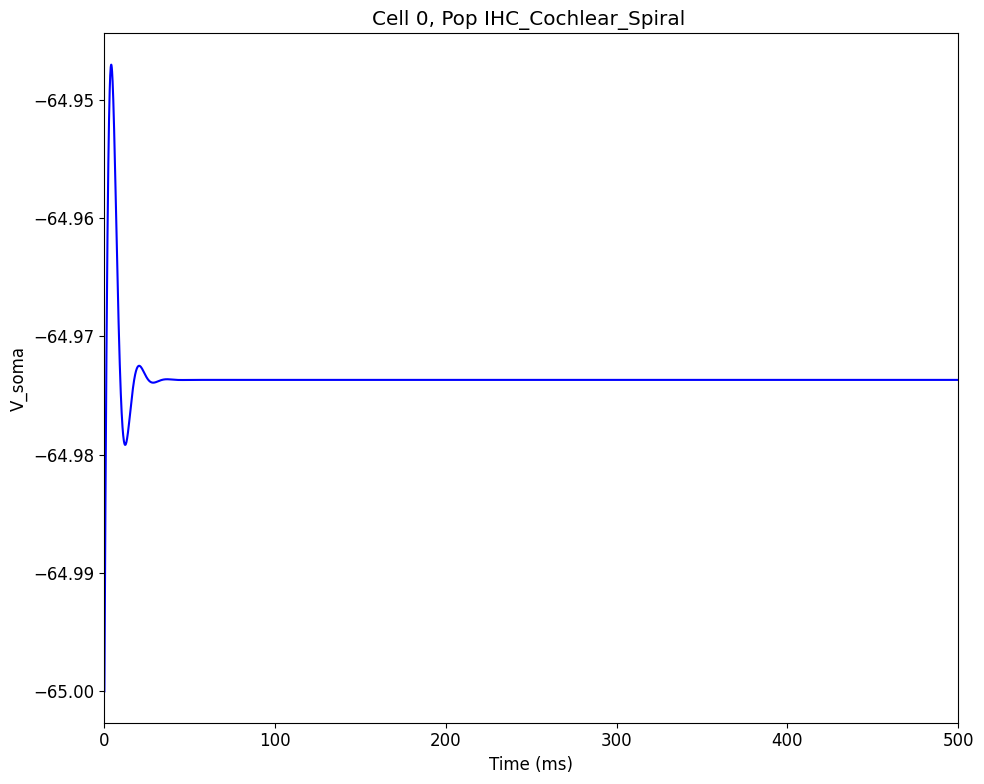

Preparing spike data...
Plotting raster...
  Done; plotting time = 0.46 s

Total time = 6.93 s


In [7]:
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)

Plotting recorded cell traces ... cell


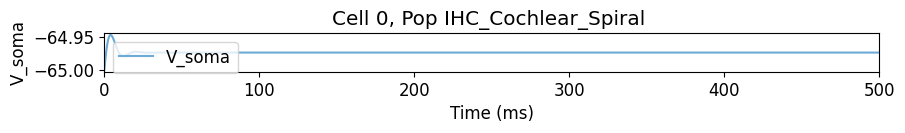

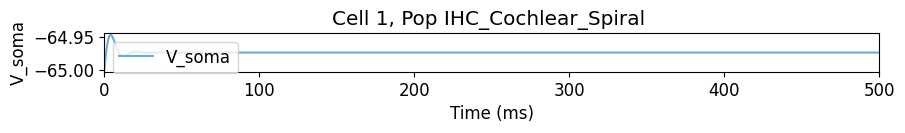

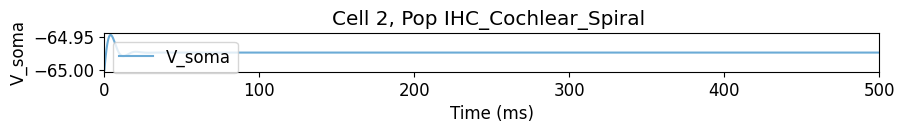

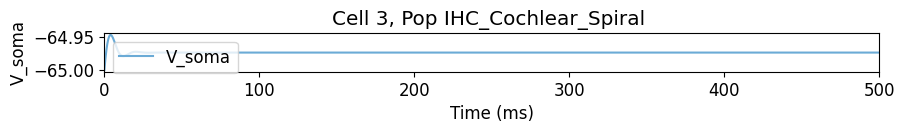

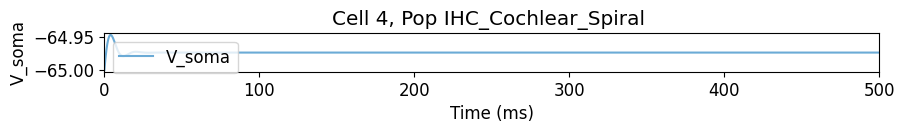

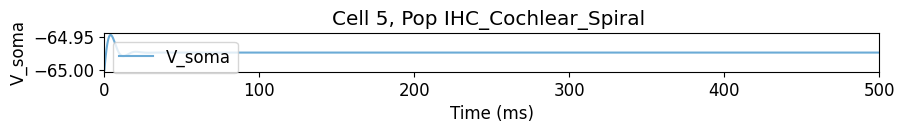

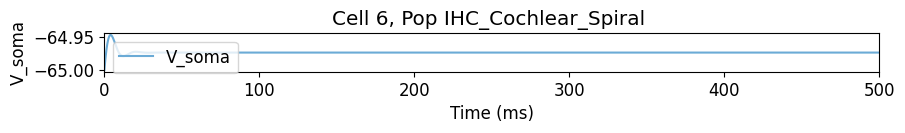

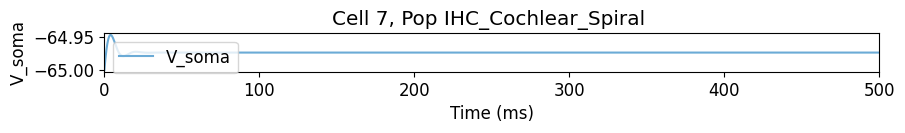

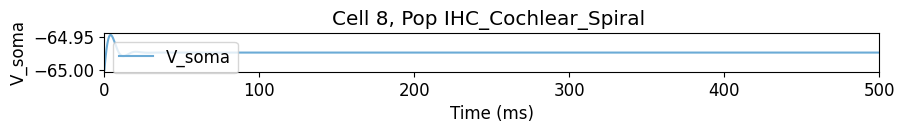

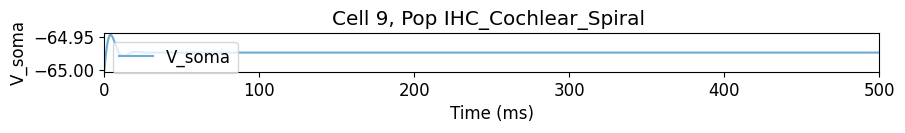

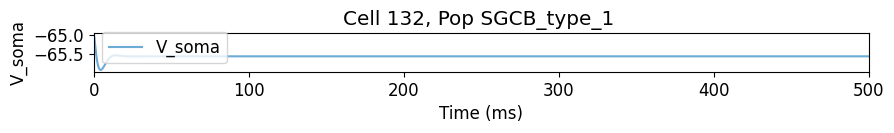

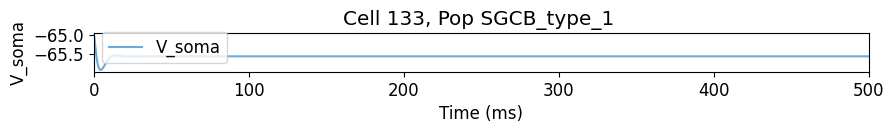

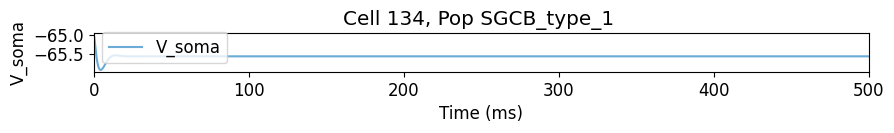

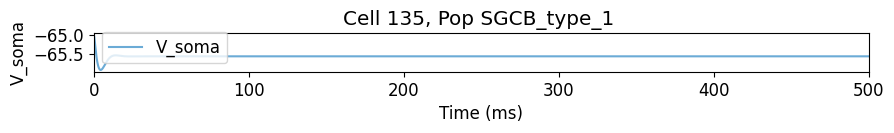

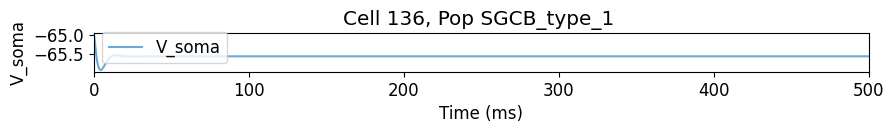

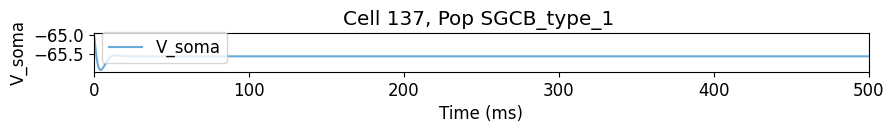

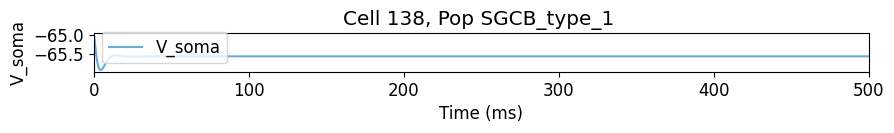

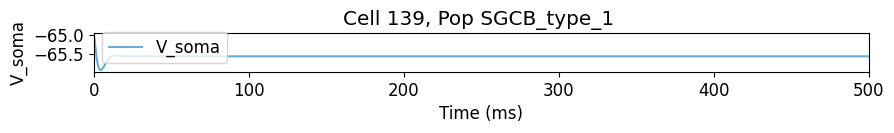

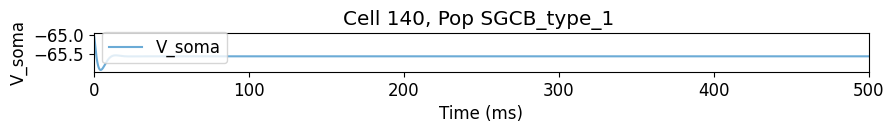

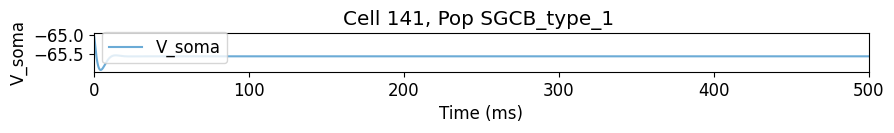

({'_gid_0': <Figure size 1000x50 with 1 Axes>,
  '_gid_1': <Figure size 1000x50 with 1 Axes>,
  '_gid_2': <Figure size 1000x50 with 1 Axes>,
  '_gid_3': <Figure size 1000x50 with 1 Axes>,
  '_gid_4': <Figure size 1000x50 with 1 Axes>,
  '_gid_5': <Figure size 1000x50 with 1 Axes>,
  '_gid_6': <Figure size 1000x50 with 1 Axes>,
  '_gid_7': <Figure size 1000x50 with 1 Axes>,
  '_gid_8': <Figure size 1000x50 with 1 Axes>,
  '_gid_9': <Figure size 1000x50 with 1 Axes>,
  '_gid_132': <Figure size 1000x50 with 1 Axes>,
  '_gid_133': <Figure size 1000x50 with 1 Axes>,
  '_gid_134': <Figure size 1000x50 with 1 Axes>,
  '_gid_135': <Figure size 1000x50 with 1 Axes>,
  '_gid_136': <Figure size 1000x50 with 1 Axes>,
  '_gid_137': <Figure size 1000x50 with 1 Axes>,
  '_gid_138': <Figure size 1000x50 with 1 Axes>,
  '_gid_139': <Figure size 1000x50 with 1 Axes>,
  '_gid_140': <Figure size 1000x50 with 1 Axes>,
  '_gid_141': <Figure size 1000x50 with 1 Axes>},
 {'tracesData': [{'t': array([0.000e+00

In [8]:
sim.analysis.plotTraces(overlay=True,figSize =(10,0.5))

In [9]:
sim.analysis.plotTraces(overlay=True,figSize=(10,2), oneFigPer='trace',timeRange = [0, 500], include = ['SGCB_type_2'])

Plotting recorded cell traces ... trace


<Figure size 1000x200 with 0 Axes>

({'_trace_V_soma': <Figure size 1000x200 with 0 Axes>},
 {'tracesData': [], 'include': ['SGCB_type_2']})

Preparing spike data...
Plotting raster...


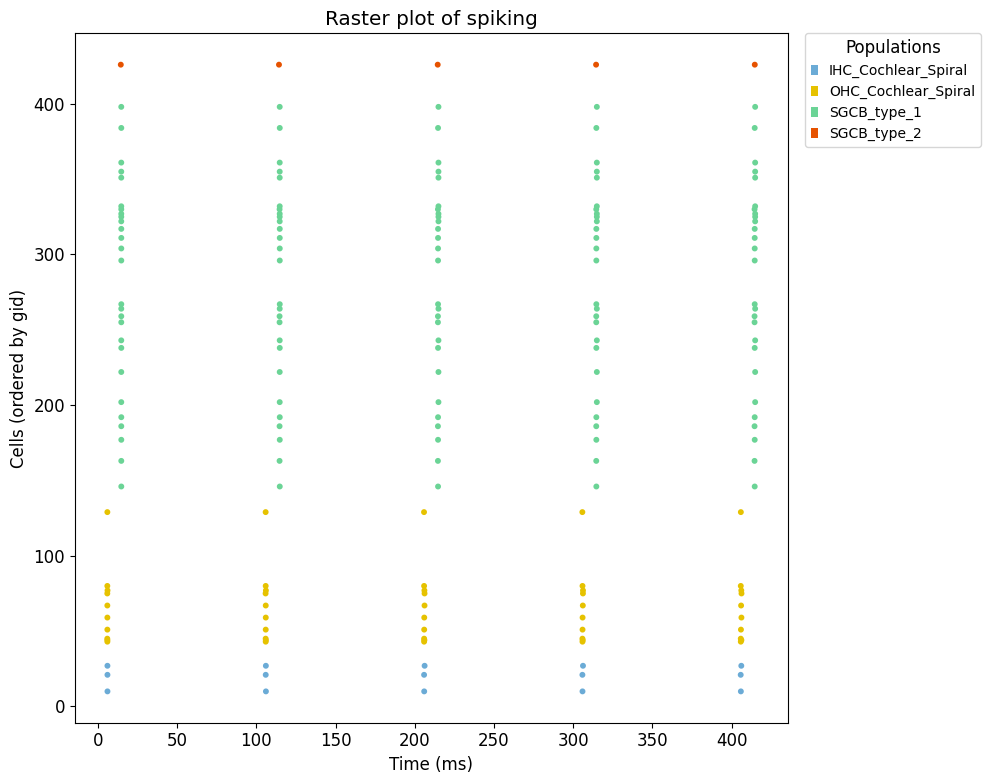

In [10]:
sim.analysis.plotRaster(marker='o', markerSize=50)

Plotting 2D representation of network cell locations and connections...


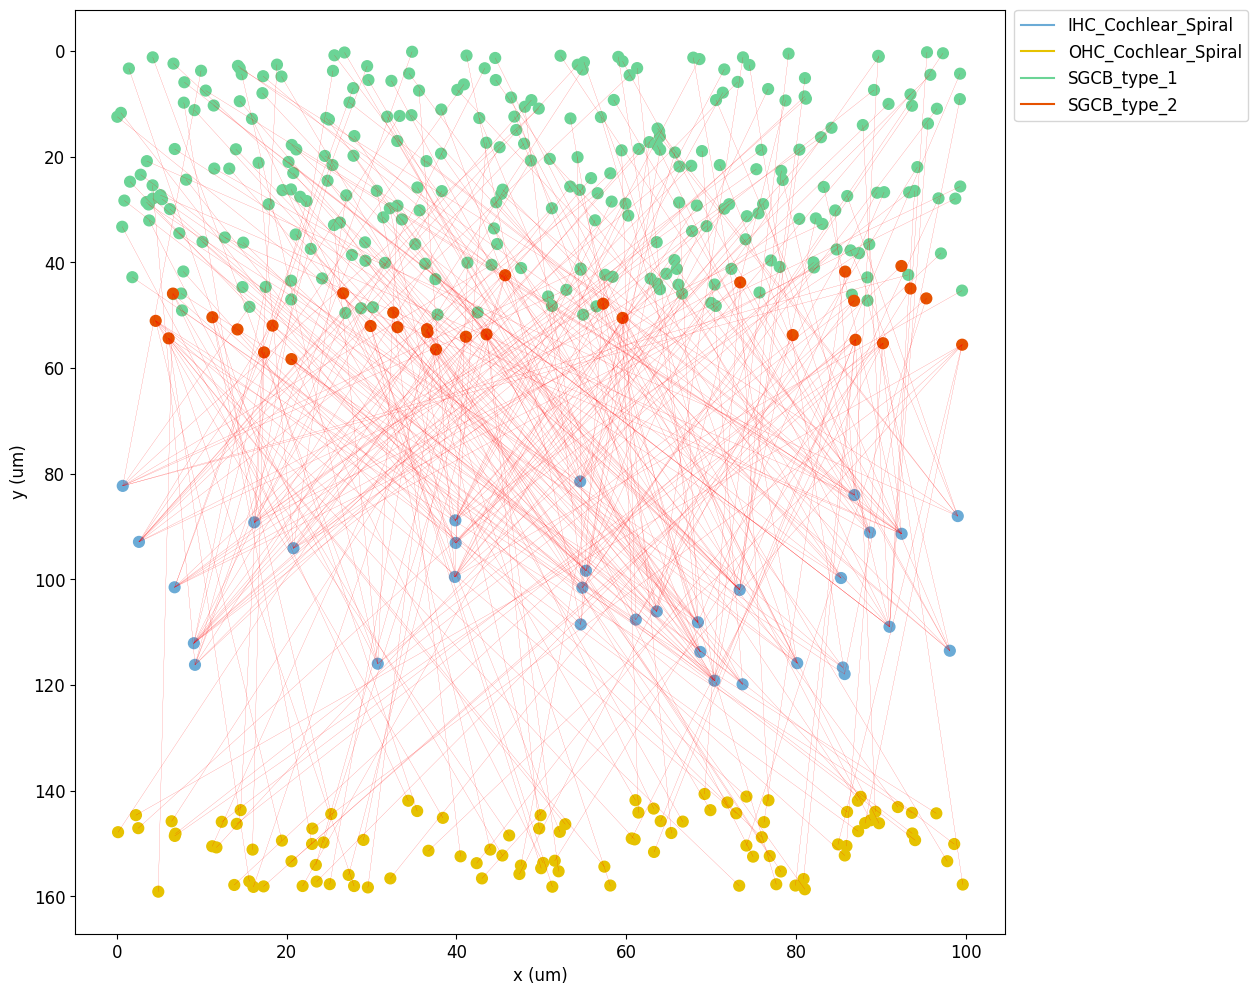

In [11]:
sim.analysis.plot2Dnet();

Plotting connectivity matrix...


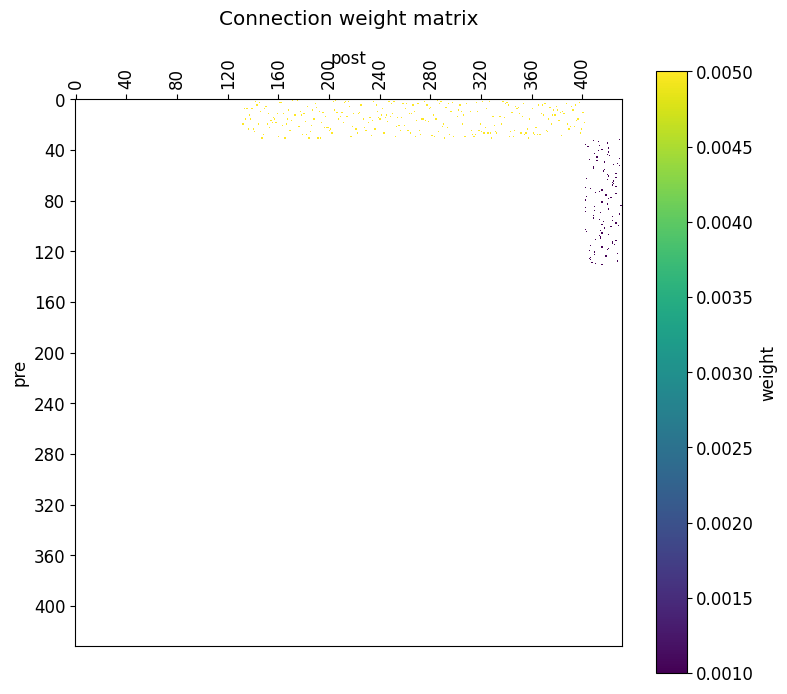

In [12]:
sim.analysis.plotConn(feature='weight', groupBy='cell');

In [13]:
spike_times = sim.allSimData['spkt']  # List of spike times
spike_ids = sim.allSimData['spkid']  # List of corresponding neuron IDs

In [14]:
SGCB1_cell_gids = sim.net.allPops["SGCB_type_1"]['cellGids']  
SGCB2_cell_gids = sim.net.allPops["SGCB_type_2"]['cellGids']  
IHC_cell_gids = sim.net.allPops["IHC_Cochlear_Spiral"]['cellGids']  
OHC_cell_gids = sim.net.allPops["OHC_Cochlear_Spiral"]['cellGids']  

In [15]:
# Percentage of cells to be selected

seed = 42
random.seed(seed)

percentage = stimulation_percentage
SGCB1_subset = random.sample(SGCB1_cell_gids,   int(len(SGCB1_cell_gids) * (percentage / 100))   )
SGCB2_subset = random.sample(SGCB2_cell_gids,   int(len(SGCB2_cell_gids) * (percentage / 100))   )
IHC_subset = random.sample(IHC_cell_gids,   int(len(IHC_cell_gids) * (percentage / 100))   )
OHC_subset = random.sample(OHC_cell_gids,   int(len(OHC_cell_gids) * (percentage / 100))   )

# save csv files with the selected cells
# SGCB1_subset_df = pd.DataFrame(SGCB1_subset)
# SGCB1_subset_df.to_csv('SGCB1_subset'+str(percentage)+'.csv', index=False, header=False)
# SGCB2_subset_df = pd.DataFrame(SGCB2_subset)
# SGCB2_subset_df.to_csv('SGCB2_subset'+str(percentage)+'.csv', index=False, header=False)
# IHC_subset_df = pd.DataFrame(IHC_subset)
# IHC_subset_df.to_csv('IHC_subset'+str(percentage)+'.csv', index=False, header=False)
# OHC_subset_df = pd.DataFrame(OHC_subset)
# OHC_subset_df.to_csv('OHC_subset'+str(percentage)+'.csv', index=False, header=False)

In [16]:
print(len(SGCB1_cell_gids), len(SGCB1_subset))

270 27


In [17]:
SGCB1_spike_count = sum([1 for gid in spike_ids if gid in SGCB1_cell_gids])
SGCB2_spike_count = sum([1 for gid in spike_ids if gid in SGCB2_cell_gids])
IHC_spike_count = sum([1 for gid in spike_ids if gid in IHC_cell_gids])
OHC_spike_count = sum([1 for gid in spike_ids if gid in OHC_cell_gids])

print(f"SGCB1_spike_count: {SGCB1_spike_count}",'\n',f"SGCB2_spike_count: {SGCB2_spike_count}",'\n',f"IHC_spike_count: {IHC_spike_count}",'\n',f"OHC_spike_count: {OHC_spike_count}")

SGCB1_spike_count: 135 
 SGCB2_spike_count: 5 
 IHC_spike_count: 15 
 OHC_spike_count: 50


In [18]:
# percentage of cells selected, spike count in selected cells

SGCB1_subset_spike_count = sum([1 for gid in spike_ids if gid in SGCB1_subset])
SGCB2_subset_spike_count = sum([1 for gid in spike_ids if gid in SGCB2_subset])
IHC_subset_spike_count = sum([1 for gid in spike_ids if gid in IHC_subset])
OHC_subset_spike_count = sum([1 for gid in spike_ids if gid in OHC_subset])

print(f"SGCB1_subset_spike_count: {SGCB1_subset_spike_count}",'\n',f"SGCB2_subset_spike_count: {SGCB2_subset_spike_count}",'\n',f"IHC_subset_spike_count: {IHC_subset_spike_count}",'\n',f"OHC_subset_spike_count: {OHC_subset_spike_count}")

SGCB1_subset_spike_count: 10 
 SGCB2_subset_spike_count: 5 
 IHC_subset_spike_count: 15 
 OHC_subset_spike_count: 50


In [19]:
df = pd.DataFrame()
df['hair_cell_stim_percent'] = [100]
df['SGCB1_spike_count'] = [SGCB1_spike_count]
df['SGCB2_spike_count'] = [SGCB2_spike_count]
df['IHC_spike_count'] = [IHC_spike_count]
df['OHC_spike_count'] = [OHC_spike_count]
print(df)

   hair_cell_stim_percent  SGCB1_spike_count  SGCB2_spike_count  \
0                     100                135                  5   

   IHC_spike_count  OHC_spike_count  
0               15               50  


In [20]:
# load df from csv
df = pd.read_csv('spike_counts.csv', index_col=0)
print(df)

   Unnamed: 0  hair_cell_stim_percent  SGCB1_spike_count  SGCB2_spike_count  \
0           0                     100               1350                115   
1           0                      90               1195                110   
2           0                      80               1030                 90   
3           0                      70                890                 90   
4           0                      60                735                 75   
5           0                      50                705                 70   
6           0                      40                560                 65   
7           0                      30                405                 35   
8           0                      20                195                 20   

   IHC_spike_count  OHC_spike_count  
0              160              500  
1              140              450  
2              125              400  
3              110              350  
4               95 

In [21]:
# Add the new data to the dataframe for the selected percentage

df.loc[len(df)] = [0,stimulation_percentage, SGCB1_spike_count,SGCB2_spike_count,IHC_spike_count,OHC_spike_count]
print(df)

   Unnamed: 0  hair_cell_stim_percent  SGCB1_spike_count  SGCB2_spike_count  \
0           0                     100               1350                115   
1           0                      90               1195                110   
2           0                      80               1030                 90   
3           0                      70                890                 90   
4           0                      60                735                 75   
5           0                      50                705                 70   
6           0                      40                560                 65   
7           0                      30                405                 35   
8           0                      20                195                 20   
9           0                      10                135                  5   

   IHC_spike_count  OHC_spike_count  
0              160              500  
1              140              450  
2              1

In [22]:
# save dataframe df
df.to_csv('spike_counts.csv', index=True)

In [23]:
# df.drop(df.tail(1).index,inplace=True) # drop last n rows
# print(df)

In [24]:
print(df)

   Unnamed: 0  hair_cell_stim_percent  SGCB1_spike_count  SGCB2_spike_count  \
0           0                     100               1350                115   
1           0                      90               1195                110   
2           0                      80               1030                 90   
3           0                      70                890                 90   
4           0                      60                735                 75   
5           0                      50                705                 70   
6           0                      40                560                 65   
7           0                      30                405                 35   
8           0                      20                195                 20   
9           0                      10                135                  5   

   IHC_spike_count  OHC_spike_count  
0              160              500  
1              140              450  
2              1

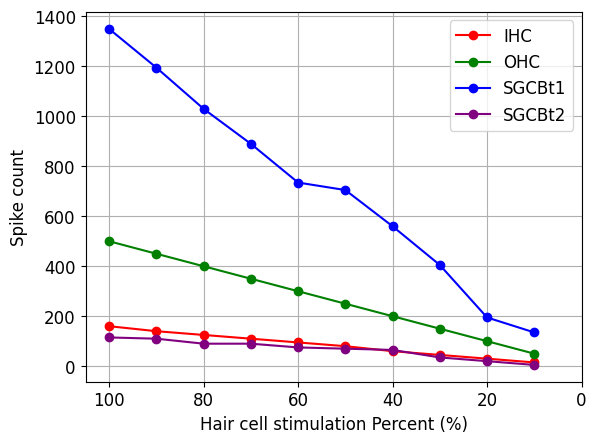

In [28]:
plt.plot(df['hair_cell_stim_percent'],df["IHC_spike_count"],label='IHC', marker='o', color='red')
plt.plot(df['hair_cell_stim_percent'],df["OHC_spike_count"],label='OHC', marker='o', color='green')
plt.plot(df['hair_cell_stim_percent'],df["SGCB1_spike_count"],label='SGCBt1', marker='o', color='blue')
plt.plot(df['hair_cell_stim_percent'],df["SGCB2_spike_count"],label='SGCBt2', marker='o', color='purple')
plt.xlim(105, 0)
# plt.ylim(0, 450)
plt.xlabel('Hair cell stimulation Percent (%)')
plt.ylabel('Spike count')
plt.legend()  # Show legend
plt.grid(True) 
plt.show()

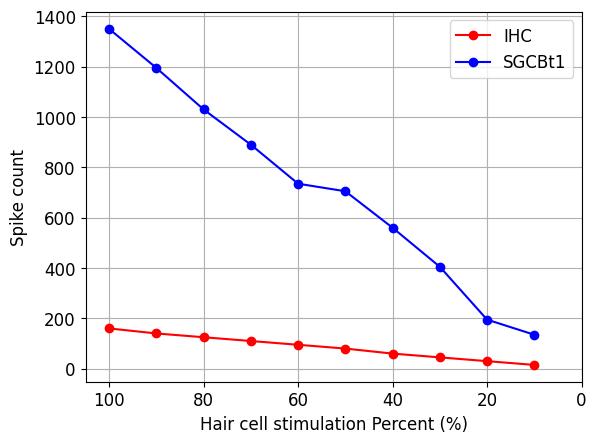

In [29]:
plt.plot(df['hair_cell_stim_percent'],df["IHC_spike_count"],label='IHC', marker='o', color='red')
# plt.plot(df['hair_cell_stim_percent'],df["OHC_spike_count"],label='OHC', marker='o', color='green')
plt.plot(df['hair_cell_stim_percent'],df["SGCB1_spike_count"],label='SGCBt1', marker='o', color='blue')
# plt.plot(df['hair_cell_stim_percent'],df["SGCB2_spike_count"],label='SGCBt2', marker='o', color='purple')
plt.xlim(105, 0)
# plt.ylim(0, 450)
plt.xlabel('Hair cell stimulation Percent (%)')
plt.ylabel('Spike count')
plt.legend()  # Show legend
plt.grid(True) 
plt.show()

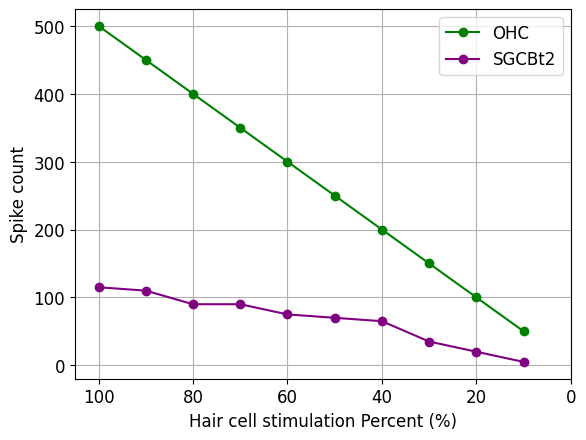

In [30]:
# plt.plot(df['hair_cell_stim_percent'],df["IHC_spike_count"],label='IHC', marker='o', color='red')
plt.plot(df['hair_cell_stim_percent'],df["OHC_spike_count"],label='OHC', marker='o', color='green')
# plt.plot(df['hair_cell_stim_percent'],df["SGCB1_spike_count"],label='SGCBt1', marker='o', color='blue')
plt.plot(df['hair_cell_stim_percent'],df["SGCB2_spike_count"],label='SGCBt2', marker='o', color='purple')
plt.xlim(105, 0)
# plt.ylim(0, 450)
plt.xlabel('Hair cell stimulation Percent (%)')
plt.ylabel('Spike count')
plt.legend()  # Show legend
plt.grid(True) 
plt.show()

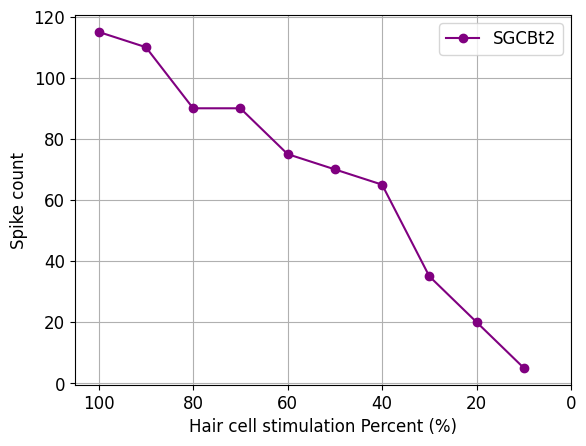

In [31]:
# plt.plot(df['hair_cell_stim_percent'],df["IHC_spike_count"],label='IHC', marker='o', color='red')
# plt.plot(df['hair_cell_stim_percent'],df["OHC_spike_count"],label='OHC', marker='o', color='green')
# plt.plot(df['hair_cell_stim_percent'],df["SGCB1_spike_count"],label='SGCBt1', marker='o', color='blue')
plt.plot(df['hair_cell_stim_percent'],df["SGCB2_spike_count"],label='SGCBt2', marker='o', color='purple')
plt.xlim(105, 0)
# plt.ylim(0, 450)
plt.xlabel('Hair cell stimulation Percent (%)')
plt.ylabel('Spike count')
plt.legend()  # Show legend
plt.grid(True) 
plt.show()